In [20]:
import numpy as np
import pandas as pd
import numpy as np
from lxml import etree
import time
import os
import csv
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [21]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [22]:
df = pd.read_csv('/content/gdrive/MyDrive/SE/final_value.csv')

#Converting postlink xml file to csv file

In [ ]:

obsolete_values = []
path = "/content/gdrive/MyDrive/SE/" 
start_time = time.time()
i = 0
count = 0 
for event,elem in etree.iterparse(path+os.path.sep+"PostLinks.xml", events=("start","end","start-ns","end-ns")):
      
          val = str(elem.attrib)        
      
          final_val = val.replace('{','').replace("'Id'","").replace('}','').replace('"','').replace(':','').replace('PostId','').replace('CreationDate','').replace('Related','').replace('LinkTypeId','').replace("'","")              
          print(val)
          # print(final_val)
          if(final_val != ''):           
            obsolete_values.append([final_val])
        
          count +=1
          if(count%1000000==0):
            print("Progress "+str(count))
                                               
          elem.clear()

print("%s seconds " % (time.time() - start_time))

In [ ]:
df = pd.DataFrame(obsolete_values)
print(df)
len(df)

                                                         0
0             19,  2010-04-26T025948.130,  109,  32412,  1
1           37,  2010-04-26T025948.600,  1970,  617600,  1
2          42,  2010-04-26T025948.647,  2154,  2451138,  1
3           52,  2010-04-26T025948.757,  2572,  209329,  1
4             58,  2010-04-26T025948.943,  3376,  2187,  1
...                                                    ...
7499398   1905114887,  2021-05-30T103716.700,  52884084...
7499399   1905116424,  2021-05-30T103908.637,  67758895...
7499400   1905116539,  2021-05-30T103920.487,  67758176...
7499401   1905116642,  2021-05-30T103930.553,  67760186...
7499402   1905116643,  2021-05-30T103930.553,  67760186...

[7499403 rows x 1 columns]


7499403

#Split the columns

In [ ]:
new =  df[0].str.split(",  ", n = 4, expand = True)
new

,0,1,2,3,4
0,19,2010-04-26T025948.130,109,32412,1
1,37,2010-04-26T025948.600,1970,617600,1
2,42,2010-04-26T025948.647,2154,2451138,1
3,52,2010-04-26T025948.757,2572,209329,1
4,58,2010-04-26T025948.943,3376,2187,1
...,...,...,...,...,...
7499398,1905114887,2021-05-30T103716.700,52884084,67759635,1
7499399,1905116424,2021-05-30T103908.637,67758895,5963269,1
7499400,1905116539,2021-05-30T103920.487,67758176,48957195,3
7499401,1905116642,2021-05-30T103930.553,67760186,31674530,1


{'Id': '5900', 'CreationDate': '2010-04-26T03:02:11.823', 'PostId': '285126', 'RelatedPostId': '171717', 'LinkTypeId': '1'}

In [ ]:
new.to_csv('/content/gdrive/MyDrive/SE/postlink.csv',header = ['Id', 'CreationDate', 'PostId','RelatedPostId','LinkTypeId'])

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/SE/postlink.csv')

In [ ]:
df

,Unnamed: 0,Id,CreationDate,PostId,RelatedPostId,LinkTypeId
0,0,19,2010-04-26T025948.130,109,32412,1
1,1,37,2010-04-26T025948.600,1970,617600,1
2,2,42,2010-04-26T025948.647,2154,2451138,1
3,3,52,2010-04-26T025948.757,2572,209329,1
4,4,58,2010-04-26T025948.943,3376,2187,1
...,...,...,...,...,...,...
7499398,7499398,1905114887,2021-05-30T103716.700,52884084,67759635,1
7499399,7499399,1905116424,2021-05-30T103908.637,67758895,5963269,1
7499400,7499400,1905116539,2021-05-30T103920.487,67758176,48957195,3
7499401,7499401,1905116642,2021-05-30T103930.553,67760186,31674530,1


#Getting obsolete comments by parsing line by line

In [ ]:
import pandas as pd
import numpy as np
from lxml import etree
import time
import os
import csv
values = ['deprecated','outdated','obsolete','out of date']
obsolete_values = []
path = "/content/gdrive/MyDrive/SE/" 
start_time = time.time()
count = 0

for event,elem in etree.iterparse(path+os.path.sep+"Comments.xml", events=("start","end","start-ns","end-ns")):
        key = ['Id','PostId','Score','Text','CreationDate','UserId','ContentLicense']
        val = elem.attrib.values() 
        zipped_val = dict(zip(key,val)) 
        textData = zipped_val.get('Text')
        textData = str(textData)
         
        if 'deprecated' in textData or 'outdated' in textData or 'obsolete' in textData or 'out of date' in textData:
          #values append
           obsolete_values.append(val)
        
           count +=1
         
           if(count%10000==0):
             print("Progress "+str(count))
                                               
        elem.clear()

print("%s seconds " % (time.time() - start_time))

Progress 10000
Progress 20000
Progress 30000
Progress 40000
Progress 50000
Progress 60000
Progress 70000
Progress 80000
Progress 90000
Progress 100000
Progress 110000
Progress 120000
Progress 130000
Progress 140000
Progress 150000
Progress 160000
Progress 170000
Progress 180000
Progress 190000
948.7580816745758 seconds 


In [ ]:
obsolete_values[0]

['205',
 '48905',
 '7',
 'I think this attitude (that theoretical questions have no bearing on a pragmatic forum) is harmful and obsolete. \n\nPragmatic approaches should be open to new technologies, because those technologies can likely improve daily activities in the near future.  eg: functional features in c#/python.',
 '2008-09-08T01:30:43.787',
 '3446',
 'CC BY-SA 2.5']

#Here I got dataset using big query Below I have put the query

select Comments.id as comment_id,Comments.Text as text, Comments.user_id as comments_userId,Comments.post_id as comments_post_id ,
Posts.owner_user_id as question_user_id, Posts.id as main_post_id,
answer.owner_user_id as answer_user_id, Posts.tags as answer_tags, Posts.creation_date question_date, Comments.creation_date comments_date,
answer.creation_date as answer_date, answer.last_edit_date as answer_last_edit_date, answer.last_activity_date as answer_last_activity_date,
Posts.last_edit_date question_last_edit_date, Posts.last_activity_date as question_last_activity_date
from `bigquery-public-data.stackoverflow.comments` Comments
join `bigquery-public-data.stackoverflow.posts_questions` Posts
on Comments.post_id = Posts.Id
join `bigquery-public-data.stackoverflow.posts_answers` answer
on Posts.id = answer.parent_id
where Comments.Text like ('%deprecated%') 
or Comments.Text like ('%outdated%')
or Comments.Text like ('%out of date%')
or Comments.Text like ('%obsolete%')


#New Dataset
#RQ1 Quanitative Analysis

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/SE/final_value.csv')

In [23]:
print(len(df))
df

103323


,Id,comment_user_id,post_id,Score,Creation_Date,Text,last_edit_date,last_activity_date,Id_1,Creation_Date_1,Score_1,tags,body,answer_post_type_id,question_posty_type_id,question_user_id,answer_user_id,accepted_answer_id
0,16881976,725418.0,12537730,2,2012-09-21 20:29:46.997 UTC,Backticks are deprecated? Do you have a source...,NaN,2012-09-21 20:27:41.093 UTC,12537730,2012-09-21 20:27:41.093 UTC,-4,perl|sh|backticks,<p>I'm experiencing some problems trying to ca...,2,1,667147.0,368630.0,12536905.0
1,16882221,589924.0,12537730,2,2012-09-21 20:41:49.03 UTC,No mentioned of them being deprecated in the [...,NaN,2012-09-21 20:27:41.093 UTC,12537730,2012-09-21 20:27:41.093 UTC,-4,perl|sh|backticks,<p>I'm experiencing some problems trying to ca...,2,1,667147.0,368630.0,12536905.0
2,50454015,863110.0,12597700,1,2015-07-05 04:49:22.963 UTC,fnRender was deprecated! use mRender / mData. ...,2012-09-26 08:55:30.957 UTC,2012-09-26 08:55:30.957 UTC,12597700,2012-09-26 08:36:00.583 UTC,23,jquery|datatables,<p>I am new to JQuery. \nCan anyone tell me ho...,2,1,1699464.0,570897.0,12597700.0
3,20633131,355540.0,13465185,0,2013-02-07 05:56:49.43 UTC,Removing the outdated gem fixed the issue for me.,2012-11-29 13:11:23.69 UTC,2012-11-29 13:11:23.69 UTC,13465185,2012-11-20 01:14:25.633 UTC,21,heroku,"<p>I get an ""Could not find RubyGem heroku (Ge...",2,1,646607.0,832.0,NaN
4,16849185,343204.0,12500215,3,2012-09-20 16:56:35.233 UTC,First: works beautifully. Second gives: WARNIN...,2014-04-15 20:44:10.09 UTC,2014-04-15 20:44:10.09 UTC,12500215,2012-09-19 17:52:00.447 UTC,21,ruby-on-rails-3|rake,<p>I'm trying to pass arguments to a Rake task...,2,1,343204.0,382818.0,12500215.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103318,71385972,5309228.0,42107979,0,2017-02-08 08:54:34.45 UTC,**don't** use the deprecated `mysql`-functions...,NaN,2017-02-08 08:22:07.617 UTC,42107979,2017-02-08 08:22:07.617 UTC,-1,php,"<p>my table have 3 field :RapperName , MusicPa...",2,1,7415865.0,4939915.0,NaN
103319,71106833,459750.0,41963909,0,2017-01-31 17:35:34.213 UTC,Do not suggest style-based attributes such as ...,NaN,2017-01-31 17:33:01.803 UTC,41963909,2017-01-31 17:33:01.803 UTC,-1,html|css,<p>I am trying to add an image next to a text ...,2,1,6950823.0,3913583.0,41963893.0
103320,70779120,1388319.0,41779268,0,2017-01-22 19:59:23.147 UTC,You didn't provide the specific `version()` re...,NaN,2017-01-21 12:21:09.223 UTC,41779268,2017-01-21 12:21:09.223 UTC,-1,mongodb,<p>I used mongo shell and i can't see my colle...,2,1,7443179.0,7443179.0,41779268.0
103321,71029005,1175966.0,41924151,0,2017-01-29 18:15:31.877 UTC,Cite reference for `<i>` being deprecated,NaN,2017-01-29 18:00:30.247 UTC,41924151,2017-01-29 18:00:30.247 UTC,-1,javascript|jquery|html|css,"<p>I have very very small code, where I descri...",2,1,7486774.0,4703153.0,NaN


#Dropping same post id associate with comment

In [24]:
df = df.drop_duplicates(subset=['post_id'])

In [25]:
df

,Id,comment_user_id,post_id,Score,Creation_Date,Text,last_edit_date,last_activity_date,Id_1,Creation_Date_1,Score_1,tags,body,answer_post_type_id,question_posty_type_id,question_user_id,answer_user_id,accepted_answer_id
0,16881976,725418.0,12537730,2,2012-09-21 20:29:46.997 UTC,Backticks are deprecated? Do you have a source...,NaN,2012-09-21 20:27:41.093 UTC,12537730,2012-09-21 20:27:41.093 UTC,-4,perl|sh|backticks,<p>I'm experiencing some problems trying to ca...,2,1,667147.0,368630.0,12536905.0
2,50454015,863110.0,12597700,1,2015-07-05 04:49:22.963 UTC,fnRender was deprecated! use mRender / mData. ...,2012-09-26 08:55:30.957 UTC,2012-09-26 08:55:30.957 UTC,12597700,2012-09-26 08:36:00.583 UTC,23,jquery|datatables,<p>I am new to JQuery. \nCan anyone tell me ho...,2,1,1699464.0,570897.0,12597700.0
3,20633131,355540.0,13465185,0,2013-02-07 05:56:49.43 UTC,Removing the outdated gem fixed the issue for me.,2012-11-29 13:11:23.69 UTC,2012-11-29 13:11:23.69 UTC,13465185,2012-11-20 01:14:25.633 UTC,21,heroku,"<p>I get an ""Could not find RubyGem heroku (Ge...",2,1,646607.0,832.0,NaN
4,16849185,343204.0,12500215,3,2012-09-20 16:56:35.233 UTC,First: works beautifully. Second gives: WARNIN...,2014-04-15 20:44:10.09 UTC,2014-04-15 20:44:10.09 UTC,12500215,2012-09-19 17:52:00.447 UTC,21,ruby-on-rails-3|rake,<p>I'm trying to pass arguments to a Rake task...,2,1,343204.0,382818.0,12500215.0
5,16170105,157882.0,12099039,1,2012-08-23 20:08:01.083 UTC,@Jake: `setAction()` is the [deprecated](http:...,2017-05-23 12:22:46.123 UTC,2016-04-27 17:03:31.733 UTC,12099039,2012-08-23 19:55:41.83 UTC,19,jsf|dynamic|jsf-2|action,<p>I'm trying to add JSF <code>&lt;h:commandBu...,2,1,1569498.0,157882.0,12099039.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103318,71385972,5309228.0,42107979,0,2017-02-08 08:54:34.45 UTC,**don't** use the deprecated `mysql`-functions...,NaN,2017-02-08 08:22:07.617 UTC,42107979,2017-02-08 08:22:07.617 UTC,-1,php,"<p>my table have 3 field :RapperName , MusicPa...",2,1,7415865.0,4939915.0,NaN
103319,71106833,459750.0,41963909,0,2017-01-31 17:35:34.213 UTC,Do not suggest style-based attributes such as ...,NaN,2017-01-31 17:33:01.803 UTC,41963909,2017-01-31 17:33:01.803 UTC,-1,html|css,<p>I am trying to add an image next to a text ...,2,1,6950823.0,3913583.0,41963893.0
103320,70779120,1388319.0,41779268,0,2017-01-22 19:59:23.147 UTC,You didn't provide the specific `version()` re...,NaN,2017-01-21 12:21:09.223 UTC,41779268,2017-01-21 12:21:09.223 UTC,-1,mongodb,<p>I used mongo shell and i can't see my colle...,2,1,7443179.0,7443179.0,41779268.0
103321,71029005,1175966.0,41924151,0,2017-01-29 18:15:31.877 UTC,Cite reference for `<i>` being deprecated,NaN,2017-01-29 18:00:30.247 UTC,41924151,2017-01-29 18:00:30.247 UTC,-1,javascript|jquery|html|css,"<p>I have very very small code, where I descri...",2,1,7486774.0,4703153.0,NaN


In [ ]:
import matplotlib.pyplot as plt
x = ['within 1 day','1-10 days','10 days - 1 month','1 month-1 year','More than 1 year']
y = lis
fig, ax = plt.subplots()
pps = ax.bar(x, y, align='center')
plt.xticks(rotation = 45)
for p in pps:
    height = p.get_height()
    height1 = '('+str(height) + ')'
    text = "{}{:.2f}%".format(height1,height * 100/count)
    ax.text(p.get_x() + p.get_width()/2., 1.01*height,
                text, ha='center', va='bottom',rotation = 30)
    #ax.text(i,v,"",fontsize=18,color='red')

plt.show()

#Date between answer and observe as obsolete

In [66]:
datex=pd.to_datetime(df['Creation_Date'])
datey = pd.to_datetime(df['Creation_Date_1'])
timeBetweenDates = datex-datey

In [67]:
one_day = ten_day = one_month = one_year = year_plus = 0
for i in timeBetweenDates:
  x,y = str(i).split('days')
  x = int(x)
  if x == 0:
    one_day +=1
  elif 1 <= x <= 10:
    ten_day += 1
  elif 10 < x <= 30:
    one_month += 1
  elif 30 < x <= 365:
    one_year += 1
  elif x> 365:
    year_plus += 1

In [68]:
lis= []
lis.append(one_day)
lis.append(ten_day)
lis.append(one_month)
lis.append(one_year)
lis.append(year_plus)
print(lis)

[47583, 7620, 1298, 7963, 27107]


In [69]:
count=one_day + ten_day + one_month + one_year + year_plus
count
lisPer = []
one_day_per = one_day * 100 / count
ten_day_per = ten_day * 100 / count
one_month_per = one_month * 100 / count
one_year_per = one_year * 100 / count
year_plus_per = year_plus * 100 / count
lisPer.append(one_day_per)
lisPer.append(ten_day_per)
lisPer.append(one_month_per)
lisPer.append(one_year_per)
lisPer.append(year_plus_per)
print(lisPer)

[51.962957704950256, 8.321411800679254, 1.4174793329765973, 8.695984536589094, 29.602166624804795]


#Plotting bar graph for RQ1

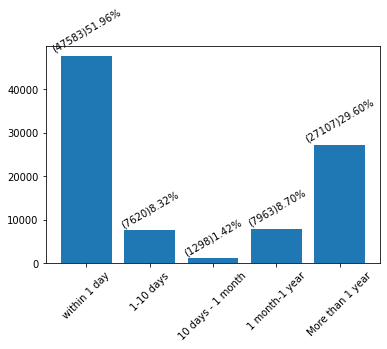

In [70]:
import matplotlib.pyplot as plt
x = ['within 1 day','1-10 days','10 days - 1 month','1 month-1 year','More than 1 year']
y = lis
fig, ax = plt.subplots()
pps = ax.bar(x, y, align='center')
plt.xticks(rotation = 45)
for p in pps:
    height = p.get_height()
    height1 = '('+str(height) + ')'
    text = "{}{:.2f}%".format(height1,height * 100/count)
    ax.text(p.get_x() + p.get_width()/2., 1.01*height,
                text, ha='center', va='bottom',rotation = 30)
    #ax.text(i,v,"",fontsize=18,color='red')

plt.show()

#Observed obsolence withing time 

#________________________________________________________________________

#RQ2

#Counting Tags

In [18]:
dfTag = df['tags'].dropna()
dfTag.head(10)

0                                    perl|sh|backticks
1                                    perl|sh|backticks
2                                    jquery|datatables
3                                               heroku
4                                 ruby-on-rails-3|rake
5                             jsf|dynamic|jsf-2|action
6                       python|datetime|int|python-2.6
7                           heroku|phantomjs|buildpack
8    sql|ruby-on-rails|ruby-on-rails-3|activerecord...
9                         php|datetime|rfc2822|rfc1123
Name: tags, dtype: object

In [19]:
import numpy as np
tagDict = []
tagDict = np.asarray(tagDict)
for tag in dfTag:
  # print(tag)
    newTag = tag.split('|')
    # print(newTag)
    tagDict = np.concatenate((tagDict,newTag))
    # print(newTag)

#Counting all the unique tags associate with obsolete 

In [20]:
total = len(tagDict)
print(total)
print(len(np.unique(tagDict)))

313591
17340


#Here 17340 which associate with obsolete answers

In [75]:
def countTopWords(words,k):
    ##### SOLUTION START #####
  freqDist = FreqDist()
  for i in words:
    freqDist[i] += 1
  topWords = freqDist.most_common(k)
  return topWords

#Getting top 20 tag by their rank 

In [76]:
import nltk
top20Words = countTopWords(tagDict,21)

In [77]:
print(top20Words)

[('javascript', 10201), ('android', 9288), ('java', 8829), ('php', 7222), ('python', 5995), ('jquery', 5596), ('html', 4922), ('c#', 4295), ('c++', 4041), ('ios', 3918), ('mysql', 3276), ('css', 2810), ('c', 2132), ('objective-c', 2056), ('node.js', 2056), ('sql', 1761), ('ruby-on-rails', 1708), ('iphone', 1517), ('angular', 1497), ('swift', 1452), ('.net', 1408)]


In [78]:
x = []
y = []
f = []
count = 0 
for i in top20Words:
  tag,freq = str(i).replace('(','').replace(')','').split(',')
  x.append(tag)
  numerical_freq = int(freq) 
  count += numerical_freq
  y.append(numerical_freq/total)
  f.append(freq)
print(y)

[0.036663911152643495, 0.03338245336592028, 0.031732739100743985, 0.025956942098264026, 0.02154692161161629, 0.020112856269992454, 0.01769040002875319, 0.015436868777630019, 0.014523955001257952, 0.014081874707975416, 0.011774431225964131, 0.010099557919706717, 0.007662725083563958, 0.007389569780397513, 0.007389569780397513, 0.006329295906264601, 0.006138806023793264, 0.005452323617151277, 0.005380440642633792, 0.005218703949969449, 0.005060561406030981]


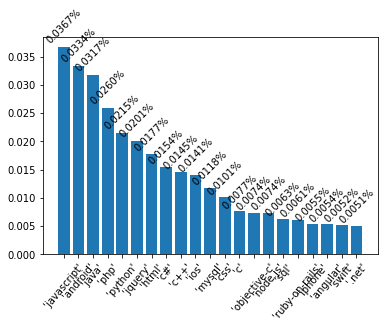

In [79]:
fig, ax = plt.subplots()
pps = ax.bar(x, y, align='center')
plt.xticks(rotation = 50)
for p in pps:
    height = p.get_height()
    height1 = '('+str(height) + ')'
    text = "{:.4f}%".format(height)
    ax.text(p.get_x() + p.get_width()/2., 1.01*height,
                text, ha='center', va='bottom',rotation = 45)
    #ax.text(i,v,"",fontsize=18,color='red')

plt.show()

In [80]:
javaScript = 10201/1151281
print(javaScript)
android = 9288/870615
print(android)
java = 8829/2261370
print(java)
php = 7222/968777
print(php)
python = 5995/625159
print(python)
jquery = 5596/773582
print(jquery)
html = 4922/653914
print(html)
csharp = 4295/982275
print(csharp)
cplus = 4041/474558
print(cplus)
ios = 3918/483511
print(ios)
mysql = 3276/414605
print(mysql)
css = 2810/420586
print(css)
c = 4368/480058
print(c)
nodejs = 2056/126355
print(nodejs)
sql = 1761/335104
print(sql)
ruby_on_rails =  1708/280567
print(ruby_on_rails)
iphone = 1517/212863
print(iphone)
angular = 1497/190086
print(angular)
swift = 1452/102280
print(swift)
dotNet = 1408/233793
print(dotNet)

0.008860564883812032
0.010668320669871298
0.003904270420143541
0.00745475997056082
0.009589560415830213
0.007233880829698726
0.007526983670635588
0.004372502608739915
0.008515292124461078
0.008103228261611422
0.007901496605202542
0.006681154389351999
0.009098900549516934
0.01627161568596415
0.005255084988540871
0.006087672463261895
0.007126649535147019
0.007875382721505004
0.014196323816973016
0.006022421543844341


#Plotting RQ2 graph

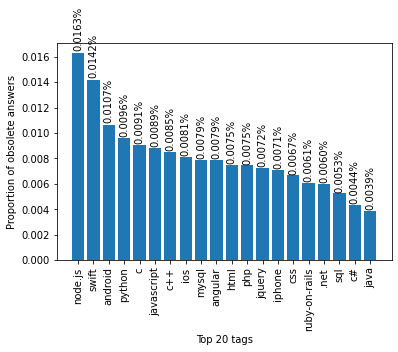

In [81]:
y = [javaScript , android, java , php , python , jquery , html , csharp , cplus,ios, mysql,css ,c,nodejs,sql,ruby_on_rails,iphone,angular,swift,dotNet]
x = ['javascript','android','java','php','python','jquery','html','c#','c++','ios', 'mysql', 'css', 'c','node.js', 'sql','ruby-on-rails','iphone','angular','swift','.net']
f = []
dtaframe = pd.DataFrame({'x':x,'y':y})
df_sorted= dtaframe.sort_values('y',ascending=False)
fig, ax = plt.subplots()
pps = plt.bar(df_sorted['x'], df_sorted['y'], align='center')
plt.xticks(rotation = 90)
for p in pps:
     height = p.get_height()
     height1 = '('+str(height) + ')'
     text = "{:.4f}%".format(height)
     ax.text(p.get_x() + p.get_width()/2., 1.01*height,
                 text, ha='center', va='bottom',rotation = 90)
    #  ax.text(i,v,"",fontsize=18,color='red')
plt.xlabel('Top 20 tags')
plt.ylabel('Proportion of obsolete answers')
plt.show()

In [83]:
df = df.drop_duplicates(subset=['post_id'])
df

,Id,comment_user_id,post_id,Score,Creation_Date,Text,last_edit_date,last_activity_date,Id_1,Creation_Date_1,Score_1,tags,body,answer_post_type_id,question_posty_type_id,question_user_id,answer_user_id
0,16881976,725418.0,12537730,2,2012-09-21 20:29:46.997 UTC,Backticks are deprecated? Do you have a source...,NaN,2012-09-21 20:27:41.093 UTC,12537730,2012-09-21 20:27:41.093 UTC,-4,perl|sh|backticks,<p>I'm experiencing some problems trying to ca...,2,1,667147.0,368630.0
2,50454015,863110.0,12597700,1,2015-07-05 04:49:22.963 UTC,fnRender was deprecated! use mRender / mData. ...,2012-09-26 08:55:30.957 UTC,2012-09-26 08:55:30.957 UTC,12597700,2012-09-26 08:36:00.583 UTC,23,jquery|datatables,<p>I am new to JQuery. \nCan anyone tell me ho...,2,1,1699464.0,570897.0
3,20633131,355540.0,13465185,0,2013-02-07 05:56:49.43 UTC,Removing the outdated gem fixed the issue for me.,2012-11-29 13:11:23.69 UTC,2012-11-29 13:11:23.69 UTC,13465185,2012-11-20 01:14:25.633 UTC,21,heroku,"<p>I get an ""Could not find RubyGem heroku (Ge...",2,1,646607.0,832.0
4,16849185,343204.0,12500215,3,2012-09-20 16:56:35.233 UTC,First: works beautifully. Second gives: WARNIN...,2014-04-15 20:44:10.09 UTC,2014-04-15 20:44:10.09 UTC,12500215,2012-09-19 17:52:00.447 UTC,21,ruby-on-rails-3|rake,<p>I'm trying to pass arguments to a Rake task...,2,1,343204.0,382818.0
5,16170105,157882.0,12099039,1,2012-08-23 20:08:01.083 UTC,@Jake: `setAction()` is the [deprecated](http:...,2017-05-23 12:22:46.123 UTC,2016-04-27 17:03:31.733 UTC,12099039,2012-08-23 19:55:41.83 UTC,19,jsf|dynamic|jsf-2|action,<p>I'm trying to add JSF <code>&lt;h:commandBu...,2,1,1569498.0,157882.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103314,41543596,3698561.0,26451149,0,2014-10-19 13:50:06.603 UTC,"deprecated, please look at the API before post...",NaN,2014-10-19 13:47:15.167 UTC,26451149,2014-10-19 13:47:15.167 UTC,-1,java|android|function|button|android-activity,"<p>The question is simple, \nHow to ignore set...",2,1,3953499.0,1688959.0
103319,41491730,19068.0,26423239,0,2014-10-17 10:40:43.653 UTC,That's quite out of date. And link-only answer...,2014-10-17 13:12:24.833 UTC,2014-10-17 13:12:24.833 UTC,26423239,2014-10-17 10:39:04.21 UTC,-1,javascript|internet-explorer|google-chrome|fir...,<p><strong>REQUIREMENT:</strong> I want to com...,2,1,2345960.0,2497000.0
103320,115072312,6025826.0,60867229,0,2020-12-01 11:26:56.623 UTC,Please explain your answer further. And the li...,NaN,2020-03-26 12:26:24.087 UTC,60867229,2020-03-26 12:26:24.087 UTC,-1,google-chrome|caching,<p>I am experiencing this weird issue where my...,2,1,1436171.0,1202683.0
103321,40727762,472495.0,26005310,4,2014-09-23 21:54:13.077 UTC,"I don't recommend nesting MySQL calls, since t...",NaN,2014-09-23 21:52:58.5 UTC,26005310,2014-09-23 21:52:58.5 UTC,-1,php|sql,<p>I'm trying to use the following script in P...,2,1,4072313.0,733876.0


In [84]:
df.head(10)
print(len(df))

91572


In [ ]:
drop = df['last_edit_date']

In [ ]:
new = drop.dropna()

In [ ]:
len(new)

52788

#51.09% have updated their answers

In [ ]:
print((len(new)*100)/len(df))

51.09027031735432


In [ ]:
len(df2)

52788

In [85]:
datex=pd.to_datetime(df['last_activity_date'])
datey = pd.to_datetime(df['last_edit_date'])
timeBetweenDates = datey-datex

In [ ]:
countDays = 0
for i in timeBetweenDates:
  stri = str(i)
  if(stri != 'NaT'):
    x,y = stri.split('days')
    x = int(x)
    countDays += x

#It took average 122 Days to add new answer after an answer obsolence was observed

In [ ]:
countDays/len(df2)

122.22853678866409

#RQ4


#Finding asker: If comment used id is same as question user id then we considered as asker observes obsolete

In [6]:
y = []
y1 = []
count1 = 0 
for i in df.index:  
   if(df['comment_user_id'][i] == df['question_user_id'][i]):
     count1 += 1
print((count1/103323)*100) 
y.append(count1)
c = "{:.1f}".format((count1/91572)*100)
y1.append(c)
  

18.789620897573627


In [7]:
print(y1)

['21.2']


# Finding Answerer: If comment used id is same as answer user id then we considered as answerer observes obsolete 


In [8]:
count =0 
for i in df.index:  
   if(df['comment_user_id'][i] == df['answer_user_id'][i]):
     count += 1
y.append(count)
c = "{:.1f}".format((count/91572)*100)
y1.append(c)
  

In [9]:
print(count)
print((count/91572)*100)
print(y1)

19599
21.40283055955969
['21.2', '21.4']


#Other answerer

In [10]:
count2 = 0
for i in df.index:  
   if df['comment_user_id'][i] != df['answer_user_id'][i] and df['comment_user_id'][i] != df['question_user_id'][i]:
      count2+=1
print(count2)
y.append(count2)
c = "{:.1f}".format((count2/91572)*100)
y1.append(c)

53092


In [11]:
print(y,y1)

[19414, 19599, 53092] ['21.2', '21.4', '58.0']


In [12]:
x = ['Asker','Answerer','AllOtherCommenter']

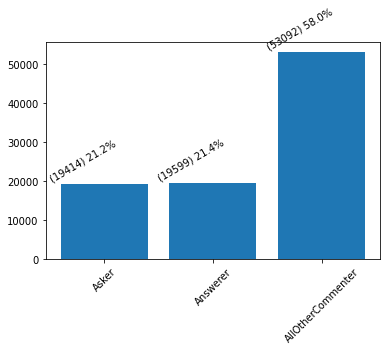

In [13]:
import matplotlib.pyplot as plt
i = 0
fig, ax = plt.subplots()
pps = ax.bar(x, y, align='center')
plt.xticks(rotation = 45)
for p in pps:
    height = p.get_height()
    height1 = '('+str(height)+')'
    text = "{:} {}%".format(height1,y1[i])
    ax.text(p.get_x() + p.get_width()/4., height,
                text, ha='center', va='bottom',rotation = 30)
    #ax.text(i,v,"",fontsize=18,color='red')
    i += 1
plt.show()

#Qualitative Analysis Result

In [6]:
data = pd.read_csv('/content/gdrive/MyDrive/SE/final_qualitative_data.csv')

In [7]:
data

,CommentID,text,CommentUserID,CommentDate,Keyword,ObsoleteType,LegacyOrInvalid
0,76497349.0,"a) RFC 2616 is obsolete, see RFCs 723* instead...",50543.0,6/26/2017 11:13,obsolete,protocol,invalid
1,71071328.0,I lost an hour because I used above syntax whi...,534471.0,1/30/2017 21:18,obsolete,tool,invalid
2,72643452.0,I am sorry but that doesn't solve my problem a...,1136905.0,3/13/2017 12:55,obsolete,ext,invalid
3,53034422.0,Make sure you've got the spacing correct. For ...,113962.0,9/15/2015 15:46,obsolete,ext,invalid
4,25828876.0,"Old and obsolete method, unreliable also. @mkd...",693806.0,7/18/2013 10:24,obsolete,lang,legacy
...,...,...,...,...,...,...,...
645,42788125.0,@kais: Of course it is. I've updated the answe...,157247.0,11/26/2014 10:09,out_of_date,lang,legacy
646,21491872.0,W3Schools often contains out of date and incor...,584192.0,03-06-2013 08:23,out_of_date,ref/lang,invalid
647,30908356.0,"Hi Satish, after discussing the issue with Wor...",1851636.0,12/17/2013 23:26,out_of_date,ext,legacy
648,61824498.0,Ben Alman's plugin is quite a bit out of date....,471924.0,05-10-2016 15:37,out_of_date,tool,invalid


#Converting LegactOrInvalid into lower case

In [8]:
data['LegacyOrInvalid'] = data['LegacyOrInvalid'].str.lower()
data

,CommentID,text,CommentUserID,CommentDate,Keyword,ObsoleteType,LegacyOrInvalid
0,76497349.0,"a) RFC 2616 is obsolete, see RFCs 723* instead...",50543.0,6/26/2017 11:13,obsolete,protocol,invalid
1,71071328.0,I lost an hour because I used above syntax whi...,534471.0,1/30/2017 21:18,obsolete,tool,invalid
2,72643452.0,I am sorry but that doesn't solve my problem a...,1136905.0,3/13/2017 12:55,obsolete,ext,invalid
3,53034422.0,Make sure you've got the spacing correct. For ...,113962.0,9/15/2015 15:46,obsolete,ext,invalid
4,25828876.0,"Old and obsolete method, unreliable also. @mkd...",693806.0,7/18/2013 10:24,obsolete,lang,legacy
...,...,...,...,...,...,...,...
645,42788125.0,@kais: Of course it is. I've updated the answe...,157247.0,11/26/2014 10:09,out_of_date,lang,legacy
646,21491872.0,W3Schools often contains out of date and incor...,584192.0,03-06-2013 08:23,out_of_date,ref/lang,invalid
647,30908356.0,"Hi Satish, after discussing the issue with Wor...",1851636.0,12/17/2013 23:26,out_of_date,ext,legacy
648,61824498.0,Ben Alman's plugin is quite a bit out of date....,471924.0,05-10-2016 15:37,out_of_date,tool,invalid


In [9]:
data_split = data.groupby('LegacyOrInvalid')
for a,b in data_split:
    if a == 'invalid':
        data_invalid = b
    elif a == 'legacy':
        data_legacy = b
        
print(data_invalid) 
print("------------------------------------------------------------------------------------------------------------")
print(data_legacy)

      CommentID  ... LegacyOrInvalid
0    76497349.0  ...         invalid
1    71071328.0  ...         invalid
2    72643452.0  ...         invalid
3    53034422.0  ...         invalid
6    75029007.0  ...         invalid
..          ...  ...             ...
639  27805085.0  ...         invalid
641  46514794.0  ...         invalid
643  56423259.0  ...         invalid
646  21491872.0  ...         invalid
648  61824498.0  ...         invalid

[215 rows x 7 columns]
------------------------------------------------------------------------------------------------------------
      CommentID  ... LegacyOrInvalid
4    25828876.0  ...          legacy
5    23142158.0  ...          legacy
7     4561624.0  ...          legacy
9    59096987.0  ...          legacy
12   46887979.0  ...          legacy
..          ...  ...             ...
642  37915328.0  ...          legacy
644  24625005.0  ...          legacy
645  42788125.0  ...          legacy
647  30908356.0  ...          legacy
649  60064758.0 

# This section is for invalid

In [10]:
data_invalid.head()

,CommentID,text,CommentUserID,CommentDate,Keyword,ObsoleteType,LegacyOrInvalid
0,76497349.0,"a) RFC 2616 is obsolete, see RFCs 723* instead...",50543.0,6/26/2017 11:13,obsolete,protocol,invalid
1,71071328.0,I lost an hour because I used above syntax whi...,534471.0,1/30/2017 21:18,obsolete,tool,invalid
2,72643452.0,I am sorry but that doesn't solve my problem a...,1136905.0,3/13/2017 12:55,obsolete,ext,invalid
3,53034422.0,Make sure you've got the spacing correct. For ...,113962.0,9/15/2015 15:46,obsolete,ext,invalid
6,75029007.0,"I don't agree, could you please refer to [this...",7597141.0,5/16/2017 11:37,obsolete,tool,invalid


In [11]:
group_invalid_data = data_invalid.groupby('ObsoleteType').size()
group_data_dictionary = dict(group_invalid_data)
group_data_dictionary

{'ext': 52,
 'ext/ref': 1,
 'lang': 36,
 'mobile': 15,
 'mobile/ext': 2,
 'mobile/tool': 1,
 'os': 4,
 'os/tool': 1,
 'protocol': 6,
 'ref': 60,
 'ref/ext': 1,
 'ref/lang': 1,
 'tool': 33,
 'tool/ref': 2}

In [12]:
group_data_final_dictionary = {}
for key, value in group_data_dictionary.items():
    if '/' not in key:
        group_data_final_dictionary[key] = value
        

group_data_final_dictionary  

{'ext': 52,
 'lang': 36,
 'mobile': 15,
 'os': 4,
 'protocol': 6,
 'ref': 60,
 'tool': 33}

In [13]:
data_invalid_names = list(group_data_final_dictionary.keys())
data_invalid_values = list(group_data_final_dictionary.values())
print(data_invalid_names)
print(data_invalid_values)

['ext', 'lang', 'mobile', 'os', 'protocol', 'ref', 'tool']
[52, 36, 15, 4, 6, 60, 33]


# This section is for invalid

In [14]:
data_legacy.head()

,CommentID,text,CommentUserID,CommentDate,Keyword,ObsoleteType,LegacyOrInvalid
4,25828876.0,"Old and obsolete method, unreliable also. @mkd...",693806.0,7/18/2013 10:24,obsolete,lang,legacy
5,23142158.0,"*""I thought ISO committee is smart enough to i...",743214.0,4/24/2013 9:04,obsolete,lang,legacy
7,4561624.0,"Cool, didn't know about that. Makes my answer ...",381179.0,11/18/2010 16:08,obsolete,tool,legacy
9,59096987.0,"For those using newer versions of .NET, you ha...",3330452.0,2/29/2016 21:33,obsolete,lang,legacy
12,46887979.0,According to the [W3C](https://www.w3.org/wiki...,NaN,NaN,obsolete,ref,legacy


In [15]:
group_data_legacy = data_legacy.groupby('ObsoleteType').size()
group_data_legacy_dictionary = dict(group_data_legacy)
group_data_legacy_dictionary

{'ext': 121,
 'lang': 132,
 'lang/mobile': 2,
 'mobile': 33,
 'mobile/ext': 8,
 'mobile/lang': 4,
 'mobile/tool': 1,
 'os': 9,
 'os/tool': 1,
 'ref': 22,
 'ref/mobile/ext': 1,
 'tool': 34,
 'tool/mobile': 2,
 'tool/os': 1}

In [16]:
group_data_legacy_final_dictionary = {}
for key, value in group_data_legacy_dictionary.items():
    if '/' not in key:
        group_data_legacy_final_dictionary[key] = value
        

group_data_legacy_final_dictionary 

{'ext': 121, 'lang': 132, 'mobile': 33, 'os': 9, 'ref': 22, 'tool': 34}

In [17]:
data_legacy_names = list(group_data_legacy_final_dictionary.keys())
data_legacy_values = list(group_data_legacy_final_dictionary.values())
print(data_legacy_names)
print(data_legacy_values)

['ext', 'lang', 'mobile', 'os', 'ref', 'tool']
[121, 132, 33, 9, 22, 34]


In [18]:
# insert protocol because it is 0
data_legacy_names.insert(4,'protocol')
data_legacy_values.insert(4,0)
print(data_legacy_names)
print(data_legacy_values)

['ext', 'lang', 'mobile', 'os', 'protocol', 'ref', 'tool']
[121, 132, 33, 9, 0, 22, 34]


# Ploting the graph for RQ3

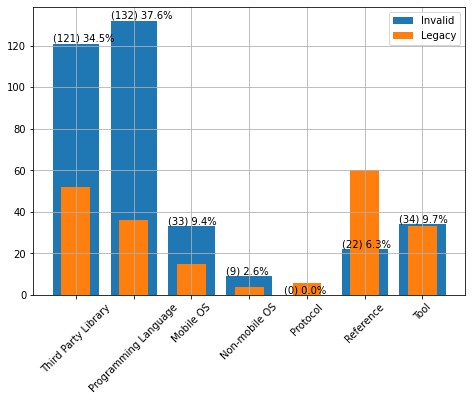

In [19]:
x_label = ['Third Party Library','Programming Language','Mobile OS','Non-mobile OS','Protocol','Reference','Tool']
fig = plt.figure()
thick = 0.50
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=45)
plt.grid()
pps = ax.bar(x_label,data_legacy_values)
ax.bar(x_label,data_invalid_values,thick)
for p in pps:
  height = p.get_height()
  height1 = height * 100 / 351

  height2 = '('+str(height)+')'
  text = "{:} {:.1f}%".format(height2,height1)
  ax.text(p.get_x(),height,text,ha='left', va='bottom')
ax.legend({'Legacy','Invalid'})
plt.show()
